
# Predicting the Price of Used Cars Using Machine Learning Algorithms
<font color = 'Blue'> 
Names: Shin Le, Jeongyeon Kim, Benjamin Horvath, Nico Reategui, Paul Giglio


Proposal: https://docs.google.com/document/d/1zhQrkWmJjjMU6wIfBC78MygGzp-XUrkaUOWALfyAL9Q/edit

Dataset: 
* https://www.kaggle.com/datasets/wspirat/germany-used-cars-dataset-2023/data
    
* https://www.kaggle.com/datasets/andreinovikov/used-cars-dataset


<div class="alert alert-block alert-warning">
<b>Update:</b>
We are in stage of cleaning data. We still have a lot of null value. 


* The size is much smaller. we lost a lot of info since I drop a lot of null value.
* Our data now is in years (2009-2024) intead of (1995-2024) after droped ourliers.
* I have to replace some classes in categorical columns to make them make more sense. Biased here, I think 

We still need to do a lot of more work on cleaning our dataset
</div>


<a id="0"></a> <br>
<font color = 'Blue'> 
# Table of Contents

1. [About Dataset](#1)
1. [Importing Libraries](#2)
1. [Functions Implementation](#3)
1. [Loading Data](#4)
1. [Data Preprocessing](#5)
1. [Exploratory Data Analysis (EDA)](#6)
   1. [Filtering Data](#61)
   1. [Detecting Outliers](#62)
   1. [Labeling Encode](#63)
   1. [Correlation Matrix](#64)
1. [Data Splitting](#7)
1. [Models Evaluations and Predictions](#8)
   1. [*Full Model* with *Linear Regression*](#81)
      1. [Using Sequential Feature Selection for the *Linear Regression*](#811)
   1. [*Decision Tree*](#82)
      1. [*A Pruned Tree*](#821)
   1. [Ensemble Method: *Random Forest Regression*](#83)
   1. [Ensemble Method: *Gradient Boosting Regression*](#84)
   1. [*Support Vector Machine* (SVM)](#85)
   1. [Evaluation](#86)


<a id="1"></a>
<font color = 'blue'> 
## **1. About Dataset**

This dataset contains data about 762,091 used cars scraped from cars.com. The data was collected on Apr, 2023.

**Feature description**

* manufacturer - name of the car manufacturer
* model - name of the car model
* year - the year when the car was produced
* mileage - the number of miles the car has traveled since production
* engine - car engine
* transmission - type of the car's transmission
* drivetrain - type of the car's drivetrain
* fuel_type - type of fuel that the car consumes
* mpg - the number of miles a car can travel using one gallon of fuel (miles per gallon)
* exterior_color - car exterior color
* interior_color - car interior color
* accidents_or_damage - whether the car was involved in accidents
* one_owner - whether the car was owned by one person
* personal_use_only - whether the car was used only for personal purposes
* seller_name - name of the seller
* seller_rating - seller's rating
* driver_rating - car rating given by drivers
* driver_reviews_num - the number of car reviews left by drivers
* price_drop - price reduction from the initial price
* price - car price

<a id="2"></a>
<font color = 'blue'> 
## **2. Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Corrected import

import statsmodels.api as sm


#preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder 

#searborn
import seaborn as sns   #using heatmap

#splitting dataset into train and test data
from sklearn.model_selection import train_test_split,cross_val_predict

#building model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




<a id="3"></a>
<font color = 'blue'> 
## **3. Functions Implementation**


* #### CORRELATION MATRIX

In [ ]:

def heat_map(data, var):
    # Calculate the correlation matrix
    correlation_matrix = data.corr()

    # Create a figure with a specific size
    plt.figure(figsize=(len(var) * 2, len(var) * 1.5))
    
    # Create a mask for the upper triangle to focus on the center
    mask = np.triu(np.ones_like(correlation_matrix), k=0)

    # Customize the color scale (cmap) to emphasize the center
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Increase the font size for annotations
    sns.heatmap(correlation_matrix, annot=True, cmap=cmap, mask=mask,  vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 14})
    plt.title('Correlation Heatmap')

    plt.show()

<a id="4"></a>
<font color = 'blue'> 
## **4. Loading Data**

<div class="alert alert-block alert-warning">
<b>Note:</b>

You have to update the link if there is an error when you load data. 

* Open **Github** -> Open the dataset - **germanycars.csv** --> Click "**View Raw**" --> **Copy the link**

You must save before you are able to **Commit & Push** 
* You can go to **File --> Auto Save**
</div>


* This is Germany car dataset that we used on our Proposal

In [ ]:
'''
# Define the URL of the CSV file on GitHub
csv_url = "https://raw.githubusercontent.com/syl21b/Car-Price-Prediction/main/germanycars.csv?token=GHSAT0AAAAAACIQMGDUI2ZHP5YRJCPW4ZVKZJ37DUA"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_url)

# Now you have the data in the 'df' DataFrame'''

* This is new dataset that is not the one we used to write our proposal

In [ ]:
import requests
import zipfile
import io
import os
import pandas as pd
from os.path import expanduser

# URL of the ZIP file
url = "https://github.com/syl21b/Car-Price-Prediction/raw/main/cars.csv.zip"

# Directory to save extracted files in your home directory
output_directory = os.path.join(expanduser("~"), "car_data")

# Ensure the output directory exists or create it if not
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Send a GET request to the URL
response = requests.get(url)

if response.status_code == 200:
    # Create a BytesIO object to work with the content
    zip_data = io.BytesIO(response.content)

    # Create a ZipFile object to extract the contents
    with zipfile.ZipFile(zip_data, 'r') as zip_ref:
        # Extract all files from the ZIP archive to the output directory
        zip_ref.extractall(output_directory)

    print("ZIP file has been successfully downloaded and extracted to the specified directory.")
else:
    print(f"Failed to download ZIP file. Status code: {response.status_code}")

# Load the CSV file into a DataFrame
csv_file_path = os.path.join(output_directory, "cars.csv")
df = pd.read_csv(csv_file_path)

# Now you can work with the 'df' DataFrame


Failed to download ZIP file. Status code: 404


<a id="5"></a>
<font color = 'blue'> 
## **5. Data Preprocessing**

In [6]:
# Sample data
df = pd.DataFrame(df)

# Use str.extract to create new columns
df[['Engine Displacement (L)', 'Engine Type', 'Engine Features']] = df['engine'].str.extract(r'(\d+\.\d+)L\s([A-Z0-9]+)\s(.+)$')

# Drop the original 'engine' column if you no longer need it
df = df.drop(columns=['engine'])

# Print the DataFrame
df

,manufacturer,model,year,mileage,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,...,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price,Engine Displacement (L),Engine Type,Engine Features
0,Mazda,CX-90 3.3 Turbo Premium Plus,2024,1.0,8-Speed Automatic,All-wheel Drive,Gasoline,NaN,51K,White,...,1.0,Cox Mazda,3.2,NaN,0,NaN,54920,3.3,I6,Turbo
1,Mazda,CX-90 S Premium Plus,2024,1.0,8-Speed Automatic,All-wheel Drive,Gasoline,NaN,Artisan Red Metallic,White,...,1.0,Cox Mazda,3.2,NaN,0,NaN,61920,NaN,NaN,NaN
2,Acura,Integra A-Spec,2023,6.0,Automatic CVT,Front-wheel Drive,Gasoline,29-36,Red,Ebony,...,0.0,Glenview Luxury Imports,4.9,4.6,5,NaN,37434,1.5,I4,16V GDI DOHC Turbo
3,Acura,Integra A-Spec Technology,2023,9705.0,Automatic CVT,Front-wheel Drive,Gasoline,29-36,Platinum White Pearl,Ebony,...,1.0,Lindsay Acura,3.6,4.6,5,484.0,34516,1.5,I4,16V GDI DOHC Turbo
4,Acura,Integra A-Spec Technology,2023,6.0,Automatic CVT,Front-wheel Drive,Gasoline,29-36,Performance,Orchid,...,1.0,Plaza Auto Mall,4.0,4.6,5,674.0,33221,1.5,I4,16V GDI DOHC Turbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758030,Toyota,Supra Turbo,1995,15800.0,6-Speed Manual,NaN,Gasoline,17-23,Black,Tan,...,1.0,Motorcar Classics,3.7,4.9,7,10000.0,89900,3.0,I6,24V SPFI DOHC Turbo
758031,Toyota,Supra Turbo,1995,44614.0,6-Speed Manual,Rear-wheel Drive,Gasoline,NaN,Silver,Black,...,1.0,Gold Coast Motors,NaN,4.9,7,6000.0,109900,3.0,I6,Turbo
758032,Volkswagen,Eurovan,1995,91849.0,Manual,Front-wheel Drive,Gasoline,NaN,White,Gray,...,1.0,Pacific Auto Center - Fontana,3.1,4.8,3,1000.0,31995,NaN,NaN,NaN
758033,Volkswagen,Eurovan Campmobile,1995,190336.0,5-Speed Manual,Front-wheel Drive,Gasoline,NaN,White,Gray,...,1.0,Lot 99,1.4,4.8,3,1000.0,25995,5.2,I5,10V SOHC


##### Before handling data
* Show the frequency for each columns. This will initially show us the outliers

In [7]:
for feature in df.columns.tolist():
    print(f"{df[feature].value_counts()}, \n")

Ford             78680
Toyota           59393
Chevrolet        54828
Nissan           48482
Jeep             41543
Mercedes-Benz    40582
Honda            37601
BMW              37509
Kia              35063
GMC              29507
Dodge            25102
Subaru           24762
Volkswagen       24485
Hyundai          22203
Lexus            21292
RAM              19364
Audi             17863
Cadillac         17614
Mazda            15431
Buick            14509
Chrysler         12609
INFINITI         12287
Land Rover       12139
Porsche          11214
Lincoln          10518
Volvo            10022
Acura             8468
Tesla             5883
Mitsubishi        5737
Jaguar            3345
Name: manufacturer, dtype: int64, 

Fusion SE                                3172
Sportage LX                              2873
Corolla LE                               2835
GLC 300 Base 4MATIC                      2718
Sentra SV                                2652
                                         ...

<a id="6"></a>
<font color = 'blue'> 
## **6. Exploratory Data Analysis (EDA)**

<a id="61"></a>
<font color = 'blue'> 
### ***1. Filtering data***


* #### Handle Missing value
   * Price Column - Target

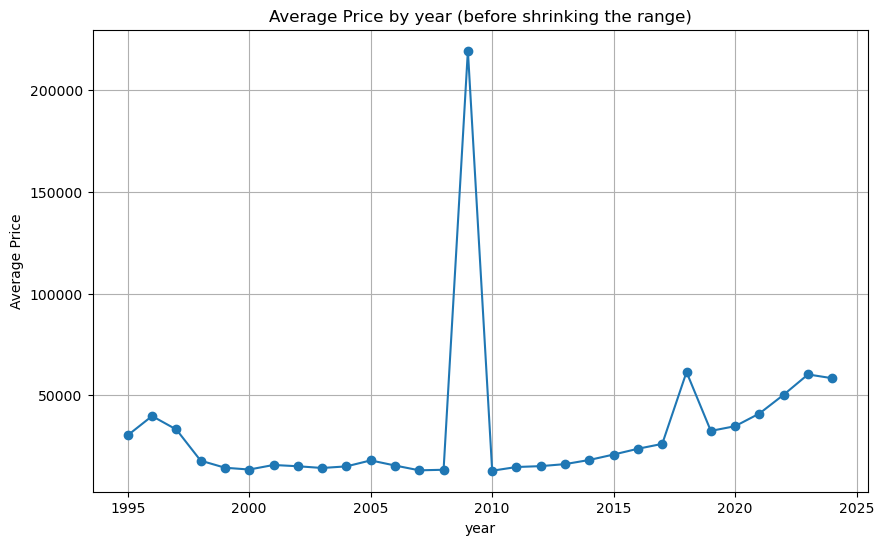

In [8]:
# before shrinkage
mean_prices_by_year = df.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(mean_prices_by_year['year'], mean_prices_by_year['price'], marker='o', linestyle='-')
plt.title('Average Price by year (before shrinking the range)')
plt.xlabel('year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()
 

<div class="alert alert-block alert-info">
<b>Problem:</b>
The original dataset has the abnormal Average Price in year 2009. So, we shrink the Price in the range (0,200000). This could a way to handle outliers. 
</div>



In [9]:
df=df[df['price'].between(0,200000)]

In [10]:

# Group by the 'year' column and calculate the Average Price for each year
yearly_mean_prices = df.groupby('year')['price'].mean()

# Fill NaN values in the 'price' column with the Average Price of their respective year
df['price'].fillna(df['year'].map(yearly_mean_prices), inplace=True)


/var/folders/3b/8cnrvmc53q97m9nqbnvfytlm0000gn/T/ipykernel_30799/3540215951.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'].fillna(df['year'].map(yearly_mean_prices), inplace=True)


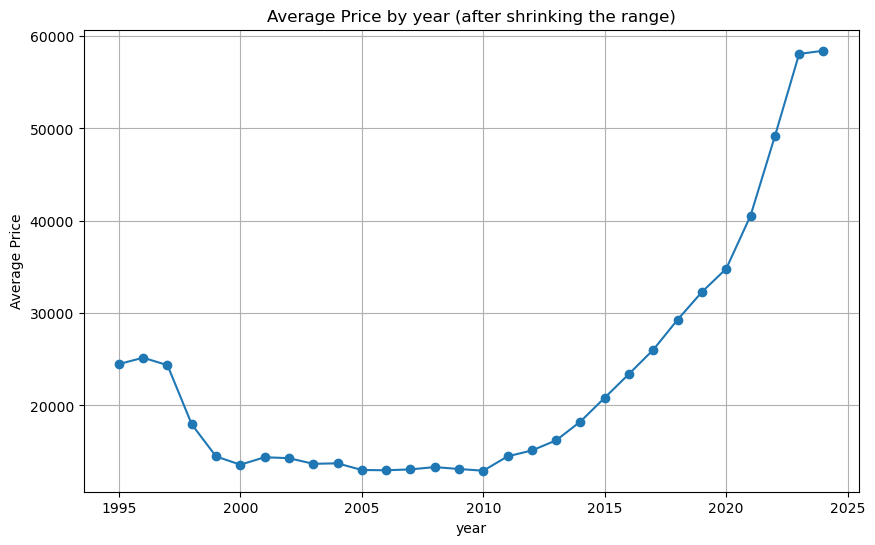

In [11]:
mean_prices_by_year = df.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(mean_prices_by_year['year'], mean_prices_by_year['price'], marker='o', linestyle='-')
plt.title('Average Price by year (after shrinking the range)')
plt.xlabel('year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

* #### Mapping from long form to abbreviation


* Drivetrain

In [12]:

df = pd.DataFrame(df)

# Create a mapping from long form to abbreviation
drivetrain_mapping = {
    'All-wheel Drive': 'AWD',
    'Front-wheel Drive': 'FWD',
    'Four-wheel Drive': '4WD',
    'Rear-wheel Drive': 'RWD'
}

# Use the replace method to update the drivetrain column
df['drivetrain'] = df['drivetrain'].replace(drivetrain_mapping)


* fuel_type

In [13]:
df = pd.DataFrame(df)
# Create a dictionary for mapping
drivetrain_mapping = {
    'Gasoline Fuel': 'Gasoline',
    'Gas': 'Gasoline',
    'Plug-In Hybrid': 'Hybrid',
    'Hybrid Fuel': 'Hybrid',
    'Gas/Electric Hybrid': 'Hybrid',
    'Gasoline/Mild Electric Hybrid': 'Hybrid',
    'Diesel Fuel': 'Diesel',
    'Rear-wheel Drive': 'Electric',
    'E85 Flex Fuel': 'Flex Fuel',
    'Flex Fuel Capability': 'Flex Fuel'
}

# Use the replace method to update the drivetrain column
df['fuel_type'] = df['fuel_type'].replace(drivetrain_mapping)


* #### Splitting `MPG` column into two separate columns

In [14]:
df['mpg'].fillna('0-0', inplace=True)

In [15]:
# Split the "MPG Range" into two columns
#df[['City MPG', 'Highway MPG']] = df['mpg'].str.split('-', expand=True).astype(int)
df[['City MPG', 'Highway MPG']] = df['mpg'].str.split('-', expand=True)

In [ ]:
# Custom function to convert elements to int or replace with zero
def convert_to_int_or_zero(value):
    if isinstance(value, str):
        # Remove non-numeric characters and try to convert to int
        numeric_value = ''.join(filter(str.isdigit, value))
        if numeric_value:
            return int(numeric_value)
    return 0

# Apply the custom function to 'City MPG' and 'Highway MPG' columns
df['City MPG'] = df['City MPG'].apply(convert_to_int_or_zero)
df['Highway MPG'] = df['Highway MPG'].apply(convert_to_int_or_zero)


In [ ]:
# Replace "N/A" values with NaN
df['City MPG'] .replace(0, np.nan, inplace=True)
df['Highway MPG'].replace(0, np.nan, inplace=True)

In [ ]:
df= df.drop('mpg', axis=1)

In [ ]:
df.isnull().sum()

In [ ]:
def Create_MPG_histograms(df, str):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(df['City MPG'], bins=20, color='skyblue', edgecolor='black')
    plt.title('City MPG Histogram '+str+' Replacing NAN')
    plt.xlabel('City MPG')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(df['Highway MPG'], bins=20, color='lightcoral', edgecolor='black')
    plt.title('Highway MPG Histogram '+str+' Replacing NAN')
    plt.xlabel('Highway MPG')
    plt.ylabel('Frequency')

    plt.tight_layout()

    # Show the histograms
    plt.show()
    
Create_MPG_histograms(df, 'Before')

* #### **Replace `NAN` in '`City MPG`' and '`Highway MPG`' by the `Mean` of each column**

In [ ]:
df['City MPG'] .replace(np.nan,df['City MPG'].mean(), inplace=True)
df['Highway MPG'].replace(np.nan,df['Highway MPG'].mean(), inplace=True)

In [ ]:
Create_MPG_histograms(df, 'After')

In [ ]:
df= df.drop('price_drop', axis=1)       #Drop this column since it does not provide useful information and has a lot of null values.

* #### **Handling `NAN` in `seller_rating`**

In [ ]:

def Create_seller_rating_histograms(df, str):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(df['seller_rating'], bins=20, color='skyblue', edgecolor='black')
    plt.title('seller_rating Histogram '+str+' Replacing NAN')
    plt.xlabel('seller_rating')
    plt.ylabel('Frequency')
    plt.tight_layout()

    # Show the histograms
    plt.show()
    
Create_seller_rating_histograms(df, 'Before')

In [ ]:
df['seller_rating'].replace(np.nan,df['seller_rating'].mean(), inplace=True)

In [ ]:
Create_seller_rating_histograms(df, 'After')

In [ ]:
df.dropna()

In [ ]:
df.isnull().sum() # Checking null values on each column

In [ ]:
# Load your dataset (replace 'your_data.csv' with your actual file)

# Use value_counts to count the frequency of each Engine Type
engine_type_counts = df['Engine Features'].value_counts()

# Get the top 20 values with the highest frequency
top_20_engine_types = engine_type_counts.head(40)

# Print the top 20 values and their frequencies
print(top_20_engine_types)

In [ ]:
df.isnull().sum()

We still have a lot of null value

In [ ]:
df.shape

* #### ...after filtering data

In [ ]:
for feature in df.columns.tolist():
    print(f"{df[feature].value_counts()}, \n")

In [ ]:
df.info() #shows a summary of our dataset

* Check and drop **Null** values

In [ ]:
df.isnull().sum()

There is null value in **fuel_consumption_g_km** column. So, we need to drop these before using it

In [ ]:
df=df.dropna().reset_index(drop=True)

* Check and drop duplicates:

In [ ]:
df=df.drop_duplicates()

The data set after cleaning up

In [ ]:
df.shape

* Counting the data for each feature:

In [ ]:
'''for feature in df.columns.tolist():
    print(f"{df[feature].value_counts()}, \n")'''

We can observe the presence of outliers, and the data spans a wide range.

<a id="62"></a>
<font color = 'blue'> 
### **2. Dectecting outliers**
* #### **For numerical columns**

Getting numerical columns

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
#numerical_cols.remove()
num_columns=df[numerical_cols]

In [ ]:
numerical_cols

* Average Price by year with outliers

<div class="alert alert-block alert-warning">
<b>Note:</b>  This method is just applied for <b>numerical features</b>. <br>
There is no specific way to detect outlier for <b>categorical columns</b>. We can plot the Frequency vs Price for each categorical columns, and then decide the outliers depend on the frequency.
</div>


In [ ]:

mean_prices_by_year = df.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(mean_prices_by_year['year'], mean_prices_by_year['price'], marker='o', linestyle='-')
plt.title('Average Price by year (before removed outliers)')
plt.xlabel('year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

We can see that in 2009, the price was so arnormal 

In [ ]:
Q1 = num_columns[numerical_cols].quantile(0.25)
Q3 = num_columns[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers and create a boolean mask
outliers_mask = (num_columns[numerical_cols] < lower_bound) | (num_columns[numerical_cols] > upper_bound)

# Drop the rows containing outliers
num_columns = num_columns[~outliers_mask]

In [ ]:
numerical_cols

In [ ]:
num_columns.shape

This is new numerical columns after removed the outliers

In [ ]:
new_num_columns= num_columns.dropna() #drop the rows which are contain NAN 
new_num_columns.shape

* Plot Average Price vs Years ((after removed outliers))


In [ ]:

mean_prices_by_year = num_columns.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(mean_prices_by_year['year'], mean_prices_by_year['price'], marker='o', linestyle='-')
plt.title('Average Price by year (after removed outliers)')
plt.xlabel('year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

<a id=""></a>
<font color = 'blue'>
* ### **For categorical columns:**


We need to plot them vs Price to see the pattern

* Drop 'model', 'seller_name'

In [ ]:
df=df.drop(['model', 'seller_name'], axis=1)


In [ ]:
cat_columns= df.select_dtypes(include=['object']).columns.tolist()
 #these are the columns that we need to plot to dectect the outliers

In [ ]:
df = df.loc[~df['transmission'].isin(['Unknown', 'Semi-automatic'])]

In [ ]:
def plot_categorical_feature(cat_columns,df):
    fig = plt.figure(figsize=(6, 6 * len(cat_columns)))

    for j, cat_feature in enumerate(cat_columns):
        ax = fig.add_subplot(len(cat_columns), 1, j+1)
        df[cat_feature].value_counts().plot(ax=ax, kind='bar')
        ax.set_xlabel(cat_feature)
        ax.set_ylabel('Frequency')
        ax.set_title(cat_feature)

    plt.tight_layout()
    plt.show()
# plot categorical features to detect and remove outliers
plot_categorical_feature(cat_columns,df)

In [ ]:
df.shape

* `Drivetrain`

In [ ]:
df = df[df['drivetrain'].isin(['FWD', 'AWD', '4WD', 'RWD'])]

* `Fuel_type`

In [ ]:

df = df[~df['fuel_type'].isin(['Compressed Natural Gas', 'Bio Diesel', 'Automatic'   ])]


* We just keep top 20 classes which are the most common in `exterior_color`, `interior_color`

In [ ]:

value_counts = df['exterior_color'].value_counts()
# Get the top 20 most frequent classes
top_20_classes = value_counts.index[:20]
# Filter the DataFrame to keep rows in the top 20 classes
df = df[df['exterior_color'].isin(top_20_classes)]


In [ ]:

value_counts = df['interior_color'].value_counts()
# Get the top 20 most frequent classes
top_20_classes = value_counts.index[:20]
# Filter the DataFrame to keep rows in the top 20 classes
df = df[df['interior_color'].isin(top_20_classes)]


* `Engine Displacement (L)`

In [ ]:
value_counts = df['Engine Displacement (L)'].value_counts()
# Get the top 30 most frequent classes
top_30_classes = value_counts.index[:30]
# Filter the DataFrame to keep rows in the top 30 classes
df = df[df['Engine Displacement (L)'].isin(top_30_classes)]


* `Engine Type` (top 10)

In [ ]:

value_counts = df['Engine Type'].value_counts()
# Get the top 10 most frequent classes
top_10_classes = value_counts.index[:10]
# Filter the DataFrame to keep rows in the top 10 classes
df = df[df['Engine Type'].isin(top_10_classes)]


* `Engine Features`

In [ ]:
value_counts = df['Engine Features'].value_counts()
# Get the top 20 most frequent classes
top_20_classes = value_counts.index[:20]
# Filter the DataFrame to keep rows in the top 20 classes
df = df[df['Engine Features'].isin(top_20_classes)]


* We just keep top 20 classes which are the most popular in `Transmission`

In [ ]:
# Get the value counts for the 'transmission' column
value_counts = df['transmission'].value_counts()

# Get the top 20 most frequent classes
top_20_classes = value_counts.index[:20]

# Filter the DataFrame to keep rows with 'transmission' in the top 20 classes
df = df[df['transmission'].isin(top_20_classes)]


In [ ]:
# Plot after cleaning data
plot_categorical_feature(cat_columns,df)

In [ ]:
df.reset_index(drop=True)

In [ ]:
# Save the DataFrame as a CSV file
#df.to_csv('~/Downloads/cleaned_data.csv', index=False)



In [ ]:
df.info()

In [ ]:
cat_columns= df.select_dtypes(include=['object']).columns.tolist()


In [ ]:
new_num_columns

In [ ]:
cat_data =df.select_dtypes(include=['object'])

In [ ]:
cleaned_df = pd.concat([new_num_columns, cat_data], axis=1)

In [ ]:
cleaned_df= cleaned_df.dropna().reset_index(drop=True)


In [ ]:
def plot_year_vs_Price (df):
    mean_prices_by_year = df.groupby('year')['price'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    plt.plot(mean_prices_by_year['year'], mean_prices_by_year['price'], marker='o', linestyle='-')
    plt.title('Average Price by year (before shrinking the range)')
    plt.xlabel('year')
    plt.ylabel('Average Price')
    plt.grid(True)
    plt.show()

plot_year_vs_Price (cleaned_df)

<a id="63"></a>
<font color = 'blue'>
### **3. Labeling Encode**

In [ ]:

cat_columns= cleaned_df.select_dtypes(include=['object']).columns.tolist()
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode each categorical column
for col in cat_columns:
    cleaned_df[col] = label_encoder.fit_transform(cleaned_df[col])

# Your DataFrame now contains the encoded values
cleaned_df

In [ ]:
cleaned_df.isnull().sum()

In [ ]:
cleaned_df['accidents_or_damage'].value_counts()

In [ ]:
cleaned_df=cleaned_df.drop(['accidents_or_damage'], axis=1)

In [ ]:
df.shape

<a id="64"></a>
<font color = 'blue'>
### **4. Correlation Matrix**

The **`correlation matrix`** shows us the correlation coefficients between varaibles. 
* If the correlation coefficient is to to 1, it appears a strong positive relationship. That means, if one variable increases, the other tends to increase as well.
* If the correlation coefficient is to to -1, it appears a strong negative relationship. That means, if one variable decreases, the other tends to decrease as well.
* If the correlation coefficient is to to 0, it appears a weak or no linear relationship between two variables.

In [ ]:
heat_map(cleaned_df, cleaned_df.columns.tolist())

<div class="alert alert-block alert-info"> <b>Tip:</b> We can see there are some correlated features. We need to select the useful feature carefully to get optimize our model as much as possible </div>

Our target is `Price`, which is strong relationship to many features. However, the variables outside our target exhibit multicollinearity, such as: City MPG - Highway MPG, year-one owner, and Engine features-Engine Type, Engine Displament(L), Engine Type, City, Highway MPG, etc.

We can also use **`variance_inflation_factor`** to diagnose the multicollinearity. Typically, a high VIF value (usually greater than 10) is an indicator of significant multicollinearity. It means that the variance of the coefficient estimate for that variable is 10 times larger than it would be if there were no multicollinearity. 

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

#calc_vif(cleaned_df.drop('price', axis=1))

So, let's  drop some features: 

In [ ]:
df2=cleaned_df.drop(['Engine Type', 'Engine Features','City MPG','interior_color', 'personal_use_only', 'driver_rating','seller_rating'], axis =1)
df2

In [ ]:
heat_map(df2, cleaned_df.columns.tolist())

In [ ]:
calc_vif(df2.drop('price', axis=1))

These are the important features that wwe will use to fit our models:
**year,
mileage	,
one_owner	,
driver_reviews_num,	
Highway MPG	,
manufacturer,	
transmission,	
drivetrain,	
fuel_type,	
exterior_color,	
Engine Displacement (L),** in dataframe `df2`

<a id="7"></a>
<font color = 'blue'>
## **7. Data Splitting**


In [ ]:
X = df2.drop('price', axis =1)
Y= df2['price']
'''X = cleaned_df.drop('price', axis =1)
Y= cleaned_df['price']'''

In [ ]:
'''# 4. Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=random_state, n_jobs=-1, k_neighbors=100)
X_resampled, y_resampled = smote.fit_resample(X, Y)

# 5. Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=random_state)'''

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

<a id="8"></a>
<font color = 'blue'>
## **8. Models Evaluations and Predictions**
   

<a id="81"></a>
<font color = 'blue'>
### **8.1 Full Model with Linear Regression**
   

In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print or store the evaluation results
print("Model 1 MAE:", mae)
print("Model 1 MSE:", mse)
print("Model 1 R2:", r2)

In [ ]:
import statsmodels.api as sm

# Add a constant term to your X_train (if not already included) for the intercept
X_train = sm.add_constant(X_train)

# Create a linear regression model
model = sm.OLS(y_train, X_train)

# Fit the model
results = model.fit()

# Display the summary
print(results.summary())

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming you have already fitted your linear regression model and have predictions
# Create a scatterplot of fitted values vs. residuals
residuals = y_test - y_pred  # Calculate the residuals

# Create a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='r', linestyle='--')

plt.show()


This indicates that there may be a **violation of the assumption of linearity** in our linear regression model. This pattern suggests that the relationship between the independent variables (**features**) and the dependent variable (`price`) is not adequately captured by a simple linear model.

So, we need to try non-linear regression:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# Create a polynomial regression model (e.g., quadratic)
degree = 2  # You can adjust the degree for the desired level of complexity

polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print or store the evaluation results
print("Model 1 MAE:", mae)
print("Model 1 MSE:", mse)
print("Model 1 R2:", r2)

<a id="811"></a>
<font color = 'blue'>
* #### **8.1.1. Using Sequential Feature Selection for the Linear Regression**
      

<a id="82"></a>
<font color = 'blue'>
   ### **8.2 Decision Tree**
   

<a id="821"></a>
<font color = 'blue'>
* #### **8.2.1. A Pruned Tree**
      

<a id="83"></a>
<font color = 'blue'>
### **8.3. Ensemble Method: Random Forest Regression**
   

<a id="84"></a>
<font color = 'blue'>
   ### **8.4. Ensemble Method: Gradient Boosting Regression**
   

<a id="85"></a>
<font color = 'blue'>
### **8.5. Support Vector Machine (SVM)**
   